In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv('Project8_skydata.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [103]:
# basedon data  description objid,specobjid  Object Identifier, so we no need those columns
df.drop(columns=['objid','specobjid'],inplace=True)

In [104]:
#Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS.
df.drop(columns=['run','rerun','camcol','field'],inplace=True)

In [105]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 non-null float64
i           10000 non-null float64
z           10000 non-null float64
class       10000 non-null object
redshift    10000 non-null float64
plate       10000 non-null int64
mjd         10000 non-null int64
fiberid     10000 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 937.6+ KB


In [107]:
df.describe(include='all')

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,NaN,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,NaN,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,NaN,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,NaN,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,NaN,0.092579,2559.000000,54468.000000,510.000000


In [108]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

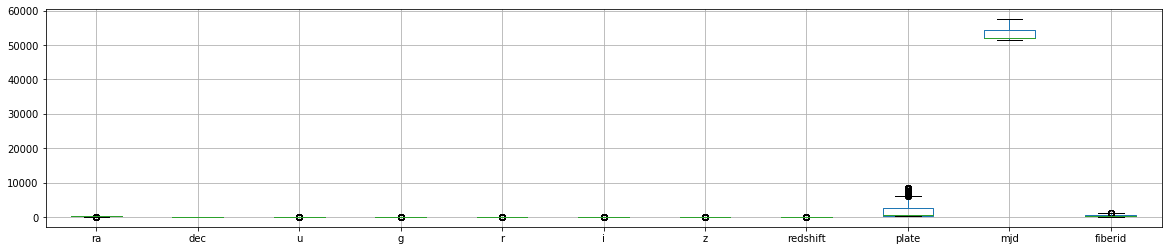

In [109]:
plt.figure(figsize=(20,4))
df.boxplot()

In [110]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'],
      dtype='object')

In [111]:
df_galaxy = df[df['class']=='GALAXY']
df_Star=df[df['class']=='STAR']
df_qso=df[df['class']=='QSO']

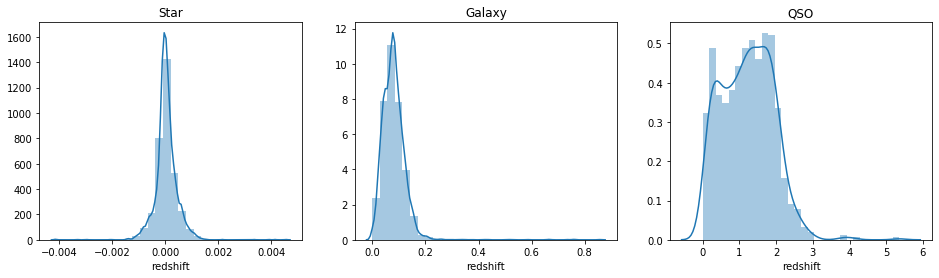

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0])
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2])
ax = ax.set_title('QSO')

In [113]:
# stars are cntered around zero
# galaxy centered around 0.75
#redshift ranges bweteen zero to 3

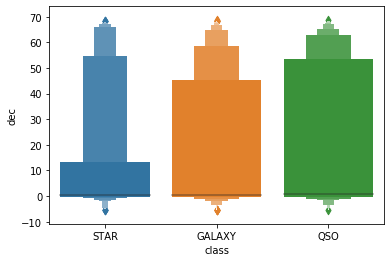

In [114]:
sns.boxenplot(x='class', y='dec', hue=None, data=df)

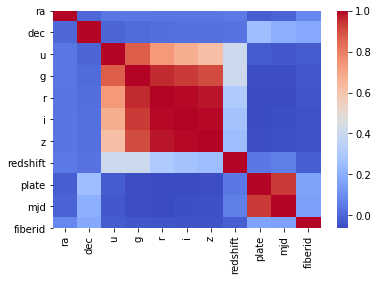

In [115]:
sns.heatmap(df_galaxy.corr(),cmap='coolwarm')

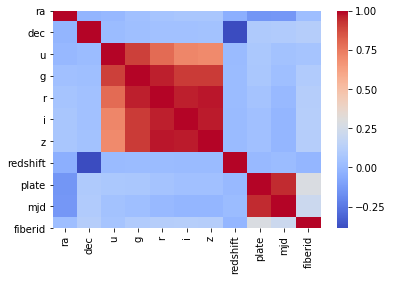

In [116]:
sns.heatmap(df_Star.corr(),cmap='coolwarm')

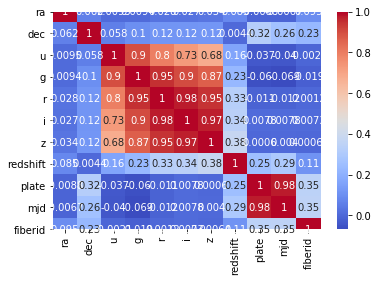

In [117]:
sns.heatmap(df_qso.corr(),cmap='coolwarm',annot=True)

In [118]:
from sklearn.preprocessing import LabelEncoder
df2=df.copy()
le = LabelEncoder()
df2['class'] = le.fit_transform(df2['class'])
df2.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512


In [119]:
#we can try to do PCA to reduce features
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df_utoi = pd.DataFrame(pca.fit_transform(df2[['u', 'g', 'r', 'i', 'z']]))

In [120]:
df3 = df2.copy()
df3 = pd.concat([df3,df_utoi],axis=1)
df3.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid,0,1,2
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [121]:
#lets rename it
df3.rename({0:'Reduced_dim_1',1:'Reduced_dim_2',2:'Reduced_dim_3'},axis=1,inplace=True)
df3.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid,Reduced_dim_1,Reduced_dim_2,Reduced_dim_3
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [122]:
# we can see values across column in extremely differnet range
from sklearn.preprocessing import MinMaxScaler 
sky_scaler = MinMaxScaler()
df_scaled = sky_scaler.fit_transform(df2.drop(columns=['class'],axis=1))

In [123]:
X=df_scaled
y=df2['class']

In [124]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3)

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
def getscore_metrics(prediction,actual):
    print("accuracy_score:",accuracy_score(prediction,actual))
    print("precision_score:",precision_score(prediction,actual,average='weighted'))
    print("recall_score:",recall_score(prediction,actual,average='weighted'))
    print("f1_score:",f1_score(prediction,actual,average='weighted'))
    print("confusion_matrix:",confusion_matrix(y_test, prediction))

In [126]:
def parsemodel(model,X,y,X_test,y_test):
    model.fit(X,y)
    pred = model.predict(X_test)
    model.score(X_test,y_test)
    getscore_metrics(pred,y_test)

In [127]:
from sklearn.neighbors import KNeighborsClassifier
print("cross_val_score:",cross_val_score(KNeighborsClassifier(),X,y,cv=5,scoring='accuracy').mean())#(LogisticRegression,X,y)
parsemodel(KNeighborsClassifier(),X_train,y_train,X_test,y_test)

cross_val_score: 0.8951999999999998
accuracy_score: 0.9043333333333333
precision_score: 0.908012801959462
recall_score: 0.9043333333333333
f1_score: 0.9046910998978877
confusion_matrix: [[1399    1   75]
 [  32  215   15]
 [ 159    5 1099]]


In [128]:
from sklearn.naive_bayes import GaussianNB 
print("cross_val_score:",cross_val_score(GaussianNB(),X,y,cv=5,scoring='accuracy').mean())#(LogisticRegression,X,y)
parsemodel(GaussianNB(),X_train,y_train,X_test,y_test)

cross_val_score: 0.9705
accuracy_score: 0.9786666666666667
precision_score: 0.9785324358213802
recall_score: 0.9786666666666667
f1_score: 0.9783429463654625
confusion_matrix: [[1445   24    6]
 [   9  253    0]
 [  12   13 1238]]


In [129]:
model_Gaussian = GaussianNB()
model_Gaussian.fit(X_train,y_train)
pred =  model_Gaussian.predict(X_test)
model_Gaussian.score(X_test,y_test)

0.9786666666666667

In [130]:
import pickle
file_name='skyserver_model.pkl'
pickle.dump(model_Gaussian,open(file_name,'wb'))

final_model = pickle.load(open(file_name,'rb'))
pred = final_model.predict(X_test)
print(accuracy_score(y_test,pred))

0.9786666666666667
